In [1]:
print(r'https://juanitorduz.github.io/germany_plots/')

import geopandas as gpd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn')

%matplotlib inline

https://juanitorduz.github.io/germany_plots/


In [2]:
plz_shape_df = gpd.read_file('plz-gebiete.shp', dtype={'plz': str}) 
plz_shape_df.head()

,plz,note,geometry
0,52538,"52538 Gangelt, Selfkant","POLYGON ((5.86632 51.05110, 5.86692 51.05124, ..."
1,47559,47559 Kranenburg,"POLYGON ((5.94504 51.82354, 5.94580 51.82409, ..."
2,52525,"52525 Waldfeucht, Heinsberg","POLYGON ((5.96811 51.05556, 5.96951 51.05660, ..."
3,52074,52074 Aachen,"POLYGON ((5.97486 50.79804, 5.97495 50.79809, ..."
4,52531,52531 Ãbach-Palenberg,"POLYGON ((6.01507 50.94788, 6.03854 50.93561, ..."


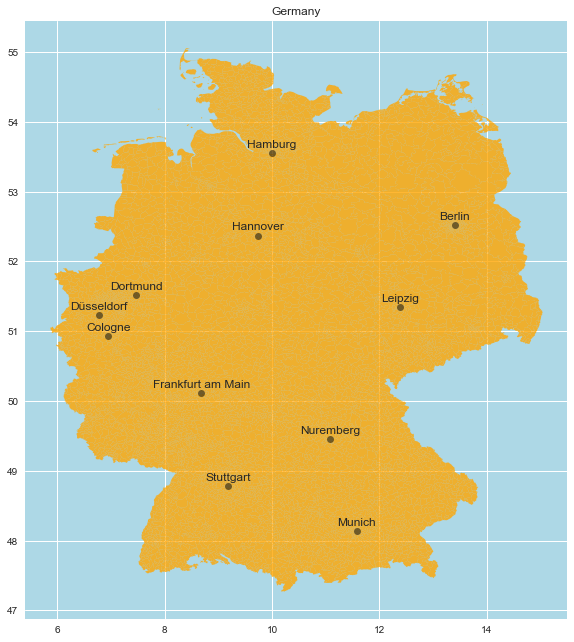

In [3]:
plt.rcParams['figure.figsize'] = [16, 11]

# Get lat and lng of Germany's main cities. 
top_cities = {
    'Berlin': (13.404954, 52.520008), 
    'Cologne': (6.953101, 50.935173),
    'Düsseldorf': (6.782048, 51.227144),
    'Frankfurt am Main': (8.682127, 50.110924),
    'Hamburg': (9.993682, 53.551086),
    'Leipzig': (12.387772, 51.343479),
    'Munich': (11.576124, 48.137154),
    'Dortmund': (7.468554, 51.513400),
    'Stuttgart': (9.181332, 48.777128),
    'Nuremberg': (11.077438, 49.449820),
    'Hannover': (9.73322, 52.37052)
}

fig, ax = plt.subplots()

plz_shape_df.plot(ax=ax, color='orange', alpha=0.8)

# Plot cities. 
for c in top_cities.keys():
    # Plot city name.
    ax.text(
        x=top_cities[c][0], 
        # Add small shift to avoid overlap with point.
        y=top_cities[c][1] + 0.08, 
        s=c, 
        fontsize=12,
        ha='center', 
    )
    # Plot city location centroid.
    ax.plot(
        top_cities[c][0], 
        top_cities[c][1], 
        marker='o',
        c='black', 
        alpha=0.5
    )

ax.set(
    title='Germany', 
    aspect=1.3, 
    facecolor='lightblue'
);


In [4]:
# Create feature.
plz_shape_df = plz_shape_df.assign(first_dig_plz = lambda x: x['plz'].str.slice(start=0, stop=1))

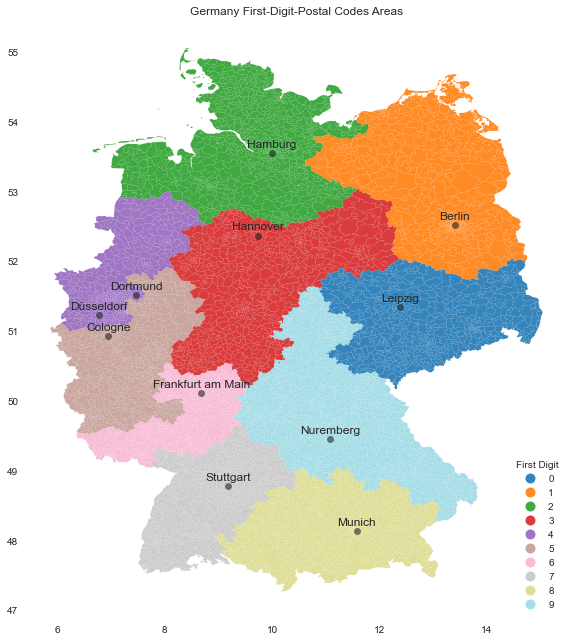

In [5]:
fig, ax = plt.subplots()

plz_shape_df.plot(
    ax=ax, 
    column='first_dig_plz', 
    categorical=True, 
    legend=True, 
    legend_kwds={'title':'First Digit', 'loc':'lower right'},
    cmap='tab20',
    alpha=0.9
)

for c in top_cities.keys():

    ax.text(
        x=top_cities[c][0], 
        y=top_cities[c][1] + 0.08, 
        s=c, 
        fontsize=12,
        ha='center', 
    )

    ax.plot(
        top_cities[c][0], 
        top_cities[c][1], 
        marker='o',
        c='black', 
        alpha=0.5
    )

ax.set(
    title='Germany First-Digit-Postal Codes Areas', 
    aspect=1.3,
    facecolor='white'
);

In [6]:
plz_region_landkreis_df = pd.read_csv(
    'zuordnung_plz_ort_landkreis.csv', 
    sep=',', 
    dtype={'plz': str}
)
plz_region_landkreis_df.drop('osm_id', axis=1, inplace=True)
plz_region_landkreis_df.drop('ags', axis=1, inplace=True)

plz_region_landkreis_df.head()

,ort,plz,landkreis,bundesland
0,Aach,78267,Landkreis Konstanz,Baden-Württemberg
1,Aach,54298,Landkreis Trier-Saarburg,Rheinland-Pfalz
2,Aachen,52062,Städteregion Aachen,Nordrhein-Westfalen
3,Aachen,52064,Städteregion Aachen,Nordrhein-Westfalen
4,Aachen,52066,Städteregion Aachen,Nordrhein-Westfalen


In [7]:
plz_region_df = pd.read_csv(
    'zuordnung_plz_ort.csv', 
    sep=',', 
    dtype={'plz': str}
)

plz_region_df.drop('osm_id', axis=1, inplace=True)

plz_region_df.head()

,ort,plz,bundesland
0,Aach,78267,Baden-Württemberg
1,Aach,54298,Rheinland-Pfalz
2,Aachen,52062,Nordrhein-Westfalen
3,Aachen,52064,Nordrhein-Westfalen
4,Aachen,52066,Nordrhein-Westfalen


In [8]:
# Merge data.
germany_df = pd.merge(
    left=plz_shape_df, 
    right=plz_region_landkreis_df, 
    on='plz',
    how='inner'
)

germany_df.drop(['note'], axis=1, inplace=True)

germany_df.head()

,plz,geometry,first_dig_plz,ort,landkreis,bundesland
0,52538,"POLYGON ((5.86632 51.05110, 5.86692 51.05124, ...",5,Gangelt,Kreis Heinsberg,Nordrhein-Westfalen
1,52538,"POLYGON ((5.86632 51.05110, 5.86692 51.05124, ...",5,Selfkant,Kreis Heinsberg,Nordrhein-Westfalen
2,47559,"POLYGON ((5.94504 51.82354, 5.94580 51.82409, ...",4,Kranenburg,Kreis Kleve,Nordrhein-Westfalen
3,52525,"POLYGON ((5.96811 51.05556, 5.96951 51.05660, ...",5,Heinsberg,Kreis Heinsberg,Nordrhein-Westfalen
4,52525,"POLYGON ((5.96811 51.05556, 5.96951 51.05660, ...",5,Waldfeucht,Kreis Heinsberg,Nordrhein-Westfalen


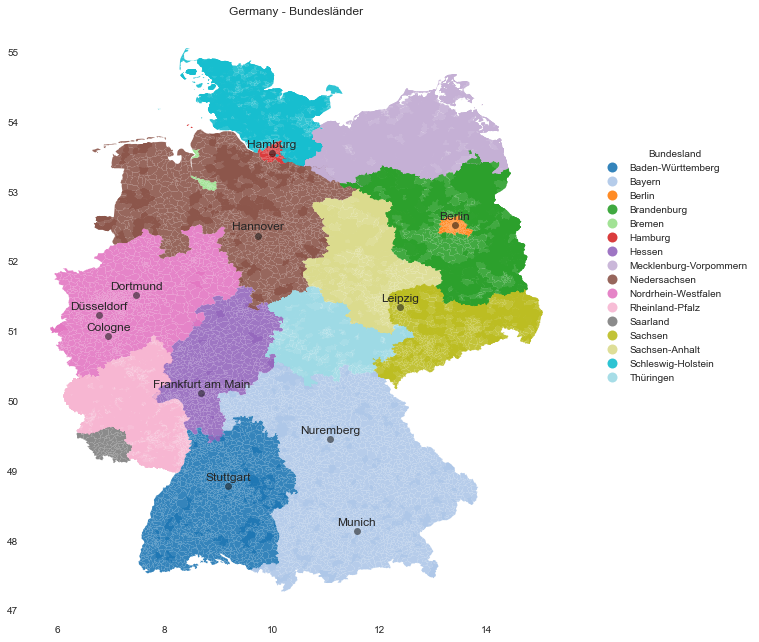

In [9]:
fig, ax = plt.subplots()

germany_df.plot(
    ax=ax, 
    column='bundesland', 
    categorical=True, 
    legend=True, 
    legend_kwds={'title':'Bundesland', 'bbox_to_anchor': (1.35, 0.8)},
    cmap='tab20',
    alpha=0.9
)

for c in top_cities.keys():

    ax.text(
        x=top_cities[c][0], 
        y=top_cities[c][1] + 0.08, 
        s=c, 
        fontsize=12,
        ha='center', 
    )

    ax.plot(
        top_cities[c][0], 
        top_cities[c][1], 
        marker='o',
        c='black', 
        alpha=0.5
    )

ax.set(
    title='Germany - Bundesländer', 
    aspect=1.3, 
    facecolor='white'
);

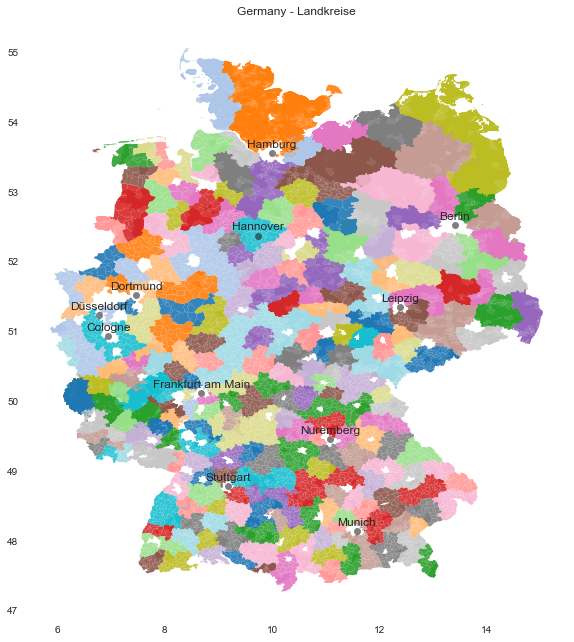

In [10]:
fig, ax = plt.subplots()

germany_df.plot(
    ax=ax, 
    column='landkreis', 
    categorical=True, 
    legend=False, 
    legend_kwds={'title':'landkreis', 'bbox_to_anchor': (1.35, 0.8)},
    cmap='tab20',
    alpha=0.9
)

for c in top_cities.keys():

    ax.text(
        x=top_cities[c][0], 
        y=top_cities[c][1] + 0.08, 
        s=c, 
        fontsize=12,
        ha='center', 
    )

    ax.plot(
        top_cities[c][0], 
        top_cities[c][1], 
        marker='o',
        c='black', 
        alpha=0.5
    )

ax.set(
    title='Germany - Landkreise', 
    aspect=1.3, 
    facecolor='white'
);

In [11]:
plz_einwohner_df = pd.read_csv(
    'plz_einwohner.csv', 
    sep=',', 
    dtype={'plz': str, 'einwohner': int}
)

plz_einwohner_df.head()

,plz,einwohner
0,01067,11957
1,01069,25491
2,01097,14821
3,01099,28018
4,01108,5876


In [12]:
germany_df = pd.merge(
    left=germany_df, 
    right=plz_einwohner_df, 
    on='plz',
    how='left'
)

germany_df.head()

,plz,geometry,first_dig_plz,ort,landkreis,bundesland,einwohner
0,52538,"POLYGON ((5.86632 51.05110, 5.86692 51.05124, ...",5,Gangelt,Kreis Heinsberg,Nordrhein-Westfalen,21390
1,52538,"POLYGON ((5.86632 51.05110, 5.86692 51.05124, ...",5,Selfkant,Kreis Heinsberg,Nordrhein-Westfalen,21390
2,47559,"POLYGON ((5.94504 51.82354, 5.94580 51.82409, ...",4,Kranenburg,Kreis Kleve,Nordrhein-Westfalen,10220
3,52525,"POLYGON ((5.96811 51.05556, 5.96951 51.05660, ...",5,Heinsberg,Kreis Heinsberg,Nordrhein-Westfalen,49737
4,52525,"POLYGON ((5.96811 51.05556, 5.96951 51.05660, ...",5,Waldfeucht,Kreis Heinsberg,Nordrhein-Westfalen,49737


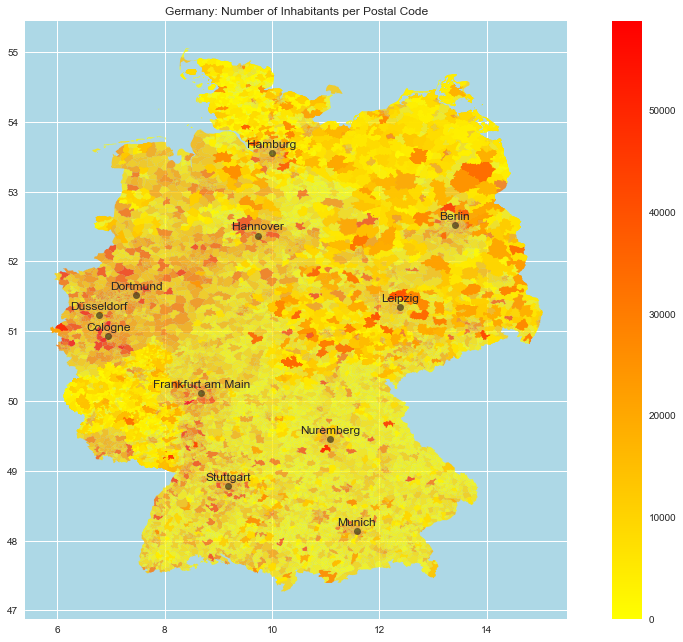

In [13]:
fig, ax = plt.subplots()

germany_df.plot(
    ax=ax, 
    column='einwohner', 
    categorical=False, 
    legend=True, 
    cmap='autumn_r',
    alpha=0.8
)

for c in top_cities.keys():

    ax.text(
        x=top_cities[c][0], 
        y=top_cities[c][1] + 0.08, 
        s=c, 
        fontsize=12,
        ha='center', 
    )

    ax.plot(
        top_cities[c][0], 
        top_cities[c][1], 
        marker='o',
        c='black', 
        alpha=0.5
    )
    
ax.set(
    title='Germany: Number of Inhabitants per Postal Code', 
    aspect=1.3, 
    facecolor='lightblue'
);

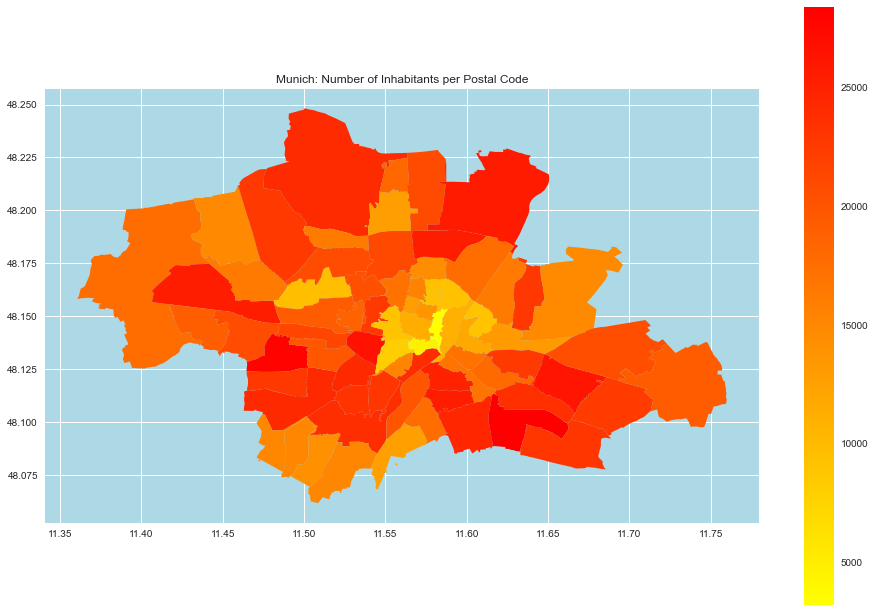

In [14]:
munich_df = germany_df.query('ort == "München"')

fig, ax = plt.subplots()

munich_df.plot(
    ax=ax, 
    column='einwohner', 
    categorical=False, 
    legend=True, 
    cmap='autumn_r',
)

ax.set(
    title='Munich: Number of Inhabitants per Postal Code', 
    aspect=1.3, 
    facecolor='lightblue'
);


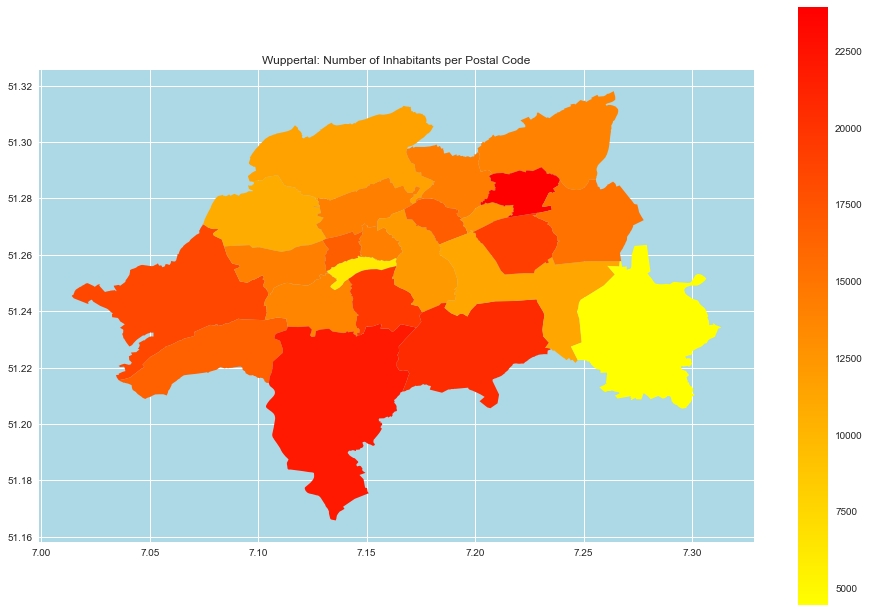

In [15]:
wuppertal_df = germany_df.query('ort == "Wuppertal"')

fig, ax = plt.subplots()

wuppertal_df.plot(
    ax=ax, 
    column='einwohner', 
    categorical=False, 
    legend=True, 
    cmap='autumn_r',
)

ax.set(
    title='Wuppertal: Number of Inhabitants per Postal Code', 
    aspect=1.3, 
    facecolor='lightblue'
);
